Model Trained. Weights(Intercepts + Lags): [ 0.00100901 -0.20451761 -0.14435279  0.05288089  0.00844229 -0.11133681
  0.09714718  0.17673145  0.30262601  0.3264951   0.38963324]


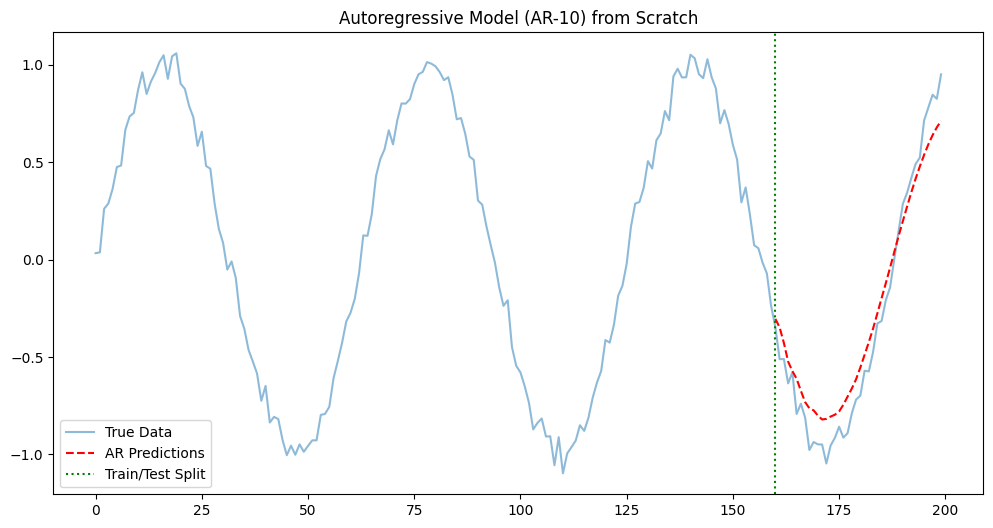

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class AutoRegressiveModel:
  def __init__(self,p_lags):
    self.p = p_lags
    self.weights = None

  def _create_lagged_matrix(self,data):
    n = len(data)
    X = []
    y = []

    for i in range(self.p,n):
      lagged_values = data[i - self.p : i]

      row = [1.0] + list(lagged_values)

      X.append(row)
      y.append(data[i])

    return np.array(X) , np.array(y)

  def fit(self,data):
    X, y = self._create_lagged_matrix(data)

    X_T = X.T

    term1 = np.linalg.pinv(np.dot(X_T,X))

    term2 = np.dot(X_T,y)

    self.weights = np.dot(term1,term2)

    print(f"Model Trained. Weights(Intercepts + Lags): {self.weights}")

  def predict_next(self,recent_history):
    input_vector = np.array([1.0] + list(recent_history))

    prediction = np.dot(input_vector,self.weights)
    return prediction

  def predict_future(self,history,steps = 10):

    current_history = list(history[-self.p:])
    predictions = []

    for _ in range(steps):

      pred = self.predict_next(current_history)
      predictions.append(pred)

      current_history.pop(0)
      current_history.append(pred)
    return predictions

t = np.linspace(0,20,200)
data = np.sin(t) + np.random.normal(0,0.05,200)

train_size = int(len(data)*0.8)
train_data = data[:train_size]
test_data = data[train_size:]

ar_model = AutoRegressiveModel(p_lags=10)
ar_model.fit(train_data)

initial_history = train_data[-10:]
future_predictions = ar_model.predict_future(initial_history,steps=len(test_data))

plt.figure(figsize = (12,6))
plt.plot(range(len(data)),data,label='True Data',alpha=0.5)
plt.plot(
    range(train_size,train_size+len(future_predictions)),
    future_predictions,
    label='AR Predictions',
    color='red',
    linestyle='--'
)

plt.axvline(x=train_size,color='green',linestyle=':',label='Train/Test Split')
plt.title(f"Autoregressive Model (AR-{10}) from Scratch")
plt.legend()
plt.show()

